In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd
import sys
sys.path.append(
    '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/code/jupyter/operations/'
)

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# Experiment Graph
import node
from node import *

# File system manangement
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ROOT_DIRECTORY = '../../data/home-credit-default-risk'
print(os.listdir(ROOT_DIRECTORY))

['application_test.csv', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [3]:
app_train = Node.load(ROOT_DIRECTORY + '/application_train.csv')
print('Training data shape: ', app_train.shape().data)
app_train.head().data

('Training data shape: ', (307511, 122))


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_test = Node.load(ROOT_DIRECTORY + '/application_test.csv')
print('Testing data shape: ', app_test.shape().data)
app_test.head().data

('Testing data shape: ', (48744, 121))


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
app_train['TARGET'].value_counts().data

0    282686
1     24825
Name: TARGET, dtype: int64

In [6]:
# Function to calculate missing values by column# Funct
def missing_values_table(dataset):
    # Total missing values
    mis_val = dataset.isnull().sum()
    
    mis_val_percent = 100 * mis_val.data / len(dataset.data)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val.data, mis_val_percent], axis=1)
     # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print("Your selected dataframe has " + str(dataset.shape().data[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [7]:
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [8]:
app_train.meta['dtypes'].value_counts()

float64    65
int64      41
object     16
dtype: int64

In [9]:
app_train.select_dtypes('object').nunique().data

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [10]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

for col in app_train.data.columns:
    if app_train[col].meta['dtype'] == 'object':
        # we are not using nunique because it discard nan
        if app_train[col].nunique(dropna=False).data <= 2:
            model = app_train[col].fit_sk_model(le)
            merged_model_data = Node.merge([model, app_train[col]])
            transformed = merged_model_data.transform_with_sk_model(col)
            app_train = app_train.drop_column(col)
            merged = Node.merge([app_train, transformed])
            app_train = merged.concat()
            
            merged_model_data = Node.merge([model, app_test[col]])
            transformed = merged_model_data.transform_with_sk_model(col)
            app_test = app_test.drop_column(col)
            merged = Node.merge([app_test, transformed])
            app_test = merged.concat()
            

            # Keep track of how many columns were label encoded
            le_count += 1
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [11]:
app_train = app_train.onehot_encode()
app_test = app_test.onehot_encode()

print('Training Features shape: ', app_train.shape().data)
print('Testing Features shape: ', app_test.shape().data)

('Training Features shape: ', (307511, 243))
('Testing Features shape: ', (48744, 239))


In [12]:
train_labels = app_train['TARGET']
for c in app_train.meta['columns']:
    if c not in app_test.meta['columns']:
        app_train = app_train.drop_column(c)
#app_train, app_test = po.align(app_train, app_test)
merged = Node.merge([app_train,train_labels])
app_train = merged.concat()

In [13]:
(app_train['DAYS_BIRTH'] * 1.0/365).describe().data

count    307511.000000
mean        -43.936973
std          11.956133
min         -69.120548
25%         -53.923288
50%         -43.150685
75%         -34.008219
max         -20.517808
Name: DAYS_BIRTH, dtype: float64

In [14]:
app_train['DAYS_EMPLOYED'].describe().data

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5,0,u'Days Employment')

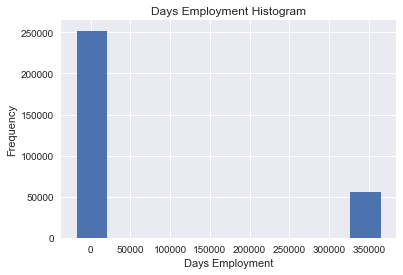

In [15]:
app_train['DAYS_EMPLOYED'].data.plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

In [16]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 *  non_anom['TARGET'].mean().data))
print('The anomalies default on %0.2f%% of loans' % (100 *  anom['TARGET'].mean().data))
print('There are %d anomalous days of employment' % anom.shape().data[0])

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Text(0.5,0,u'Days Employment')

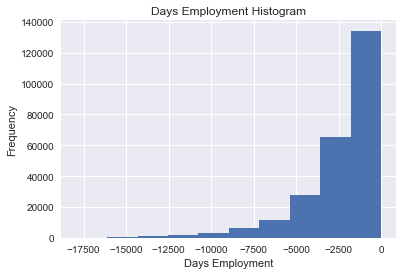

In [17]:
days_employed_anom = app_train["DAYS_EMPLOYED"] == 365243
days_employed_anom.setname('DAYS_EMPLOYED_ANOM')
merged = Node.merge([app_train, days_employed_anom])
app_train = merged.concat()
temp = app_train['DAYS_EMPLOYED'].replace({365243: np.nan})
app_train = app_train.drop_column('DAYS_EMPLOYED')
merged = Node.merge([app_train, temp])
app_train = merged.concat()

app_train["DAYS_EMPLOYED"].data.plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')     

In [18]:
days_employed_anom = app_test["DAYS_EMPLOYED"] == 365243
days_employed_anom.setname('DAYS_EMPLOYED_ANOM')
merged = Node.merge([app_test, days_employed_anom])
app_test = merged.concat()
temp = app_test['DAYS_EMPLOYED'].replace({365243: np.nan})
app_test = app_test.drop_column('DAYS_EMPLOYED')
merged = Node.merge([app_test, temp])
app_test = merged.concat()
print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum().data, app_test.shape().data[0]))


There are 9274 anomalies in the test data out of 48744 entries


In [19]:
reload(node)
correlations = app_train.corr()
top = correlations.data['TARGET'].sort_values()
#correlations = po.f_sort_values(po.project(po.d_corr(app_train), 'TARGET'))
# Display correlations
print('Most Positive Correlations:\n', top.tail(15))
print('\nMost Negative Correlations:\n', top.head(15))

('Most Positive Correlations:\n', OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64)
('\nMo

In [20]:
abs_age = app_train['DAYS_BIRTH'].abs()
app_train = app_train.drop_column('DAYS_BIRTH')
merged = Node.merge([app_train, abs_age])
app_train = merged.concat()
app_train['DAYS_BIRTH'].corr(app_train['TARGET']).data

-0.078239308309827088

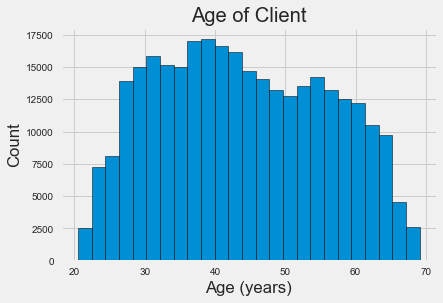

In [21]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist((app_train['DAYS_BIRTH']/365).data, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

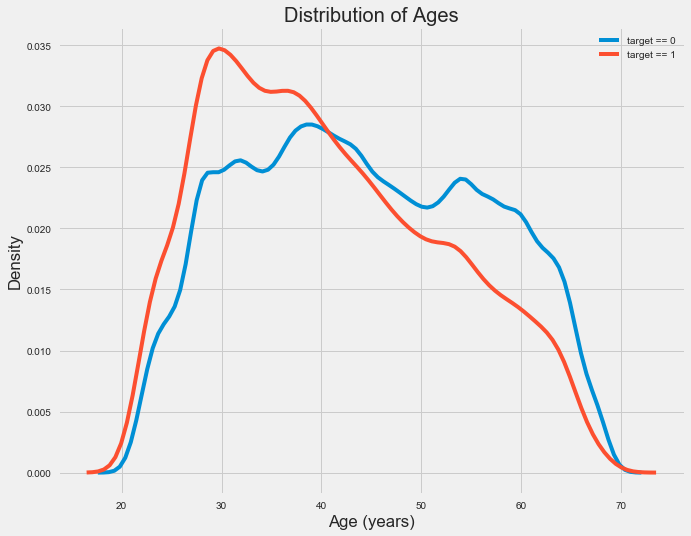

In [22]:
plt.figure(figsize = (10, 8))
# KDE plot of loans that were repaid on time
sns.kdeplot((app_train[app_train['TARGET'] == 0]['DAYS_BIRTH']/365).data, label = 'target == 0')
# KDE plot of loans which were not repaid on time
sns.kdeplot((app_train[app_train['TARGET'] == 1]['DAYS_BIRTH']/365).data, label = 'target == 1')
# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [23]:
reload(node)
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
years_birth = age_data['DAYS_BIRTH'] / 365
years_birth.setname('YEARS_BIRTH')
merged = Node.merge([age_data, years_birth])
age_data = merged.concat()



In [24]:
binned = age_data['YEARS_BIRTH'].binning(20, 70, 11)
binned.setname('YEARS_BINNED')
merged = Node.merge([age_data, binned])
age_data = merged.concat()
age_data.head(10).data

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [25]:
UNTIL HERE

SyntaxError: invalid syntax (<ipython-input-25-076e5fdeb6db>, line 1)

In [ ]:
reload(po)
age_groups = po.d_groupby_mean(age_data,'YEARS_BINNED')
age_groups

In [ ]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), po.f_multi(po.project(age_groups,'TARGET'), 100))

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [ ]:
ext_data = po.project(app_train, ['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])
ext_data_corrs = po.d_corr(ext_data)
ext_data_corrs

In [ ]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

In [ ]:
reload(po)
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, column in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    source_data = po.project(ext_data, [column, 'TARGET'])
    source_data = po.project(po.d_filter_rows_equal(df=source_data, column_name='TARGET', value=0), column)
    sns.kdeplot(po.f_dropna(source_data), label = 'target == 0')
    # plot loans that were not repaid
    source_data = po.project(ext_data, [column, 'TARGET'])
    source_data = po.project(po.d_filter_rows_equal(df=source_data, column_name='TARGET', value=1), column)
    sns.kdeplot(po.f_dropna(source_data), label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % column)
    plt.xlabel('%s' % column); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [ ]:
# Copy the data for plotting
plot_data = po.drop_column(ext_data,col_name= ['DAYS_BIRTH'])

# Add in the age of the client in years
plot_data = po.add_column(data=plot_data, col_name='YEARS_BIRTH', data_object=po.project(age_data, 'YEARS_BIRTH'))
# Drop na values and limit to first 100000 rows
plot_data = po.d_head(po.d_dropna(plot_data), 100000)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);